# Project: Investigate a Dataset (TMBD MOVIES)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources used">Resources Used</a></li>  
</ul>

<a id='intro'></a>
## Introduction

> The TMBD Movies dataset contains information about 10866 movies, with information about the popularity, budget, revenue, casts, directors, production company, runtime, release date, release year, vote, among others.<br>
> The aim of this project is to investigate the data, explore, get information about it, get useful and data-driven insights by asking appropriate questions with the use of proper analysis and visualization tools. Investigate the sucess of a movie.


In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the data will be loaded, checked for cleanliness, trimmed and cleaned for analysis. 

### General Properties

In [2]:
# to display all columns

pd.set_option("display.max_columns", None)

In [3]:
# read the dataset and get the first 5 rows

df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# check the shape of the dataset, to get the number of rows and columns

df.shape

(10866, 21)

In [5]:
# get additional information about the datatypes of each rows, to determine if datatypes should be adjusted appropriately 
# and also to check the number of non-null value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning

> Based on the information derived above, release_date column is formated as _object_. The datatype will be changed to _datetime_

In [6]:
df["release_date"] = df["release_date"].astype("datetime64[ns]")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [7]:
# to check the number of missing values in each columns

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.drop(["id", "imdb_id", "homepage", "tagline","keywords", "overview"], axis = 1, inplace = True)

> Some rows were dropped because they have no effect on the aim of this project (to check how sucessful a movie is), while some were dropped because they are similar to other columns in the dataset.

In [9]:
# to check the sum of missing values for each columns after the necessary rows have been dropped 

df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# check for duplicates

df.duplicated().sum()

1

In [11]:
# drop duplicates

df.drop_duplicates(subset=None, keep='first', inplace=False)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00


In [12]:
# check a brief statistics of numerical values (main aim is to check the minimum values for both budget and revenue)

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


In [13]:
# remove rows have both budget and revenue as zeros 
# because we are trying to check how much revenue a movie generates (success of a movie).


zero_bud_rev = df.query("budget == 0 and revenue == 0")

len(zero_bud_rev)

4701

In [14]:
# drop index of zero budget and revenue from the dataset

df.drop(zero_bud_rev.index, inplace = True)

In [15]:
# check the sum of missing rows for each columns

df.isnull().sum()

popularity                0
budget                    0
revenue                   0
original_title            0
cast                     12
director                  4
runtime                   0
genres                    1
production_companies    186
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

In [16]:
# check the new shape

df.shape

(6165, 15)

In [17]:
# to get the rows with budget and revenue as zero each and get the length

budget_zero = df.query("budget == 0")
revenue_zero = df.query("revenue == 0")

print(len(budget_zero))
print(len(revenue_zero))

995
1315


In [18]:
# drop rows with revenue == 0, because it does not help in determining the success of a movie

df.drop(revenue_zero.index, inplace = True)

In [19]:
df[df["cast"].isnull()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1088,0.226028,0,1503616,Finding Vivian Maier,NaN,John Maloof|Charlie Siskel,83,Documentary,NaN,2014-03-28,70,7.8,2014,0.000000e+00,1.384967e+06
4127,0.193929,3000000,13308,Naqoyqatsi,NaN,Godfrey Reggio,89,Documentary|Drama|Music|Thriller,Qatsi Productions,2002-09-02,20,6.0,2002,3.636784e+06,1.613277e+04
4889,0.075043,2500000,33400000,2016: Obama's America,NaN,Dinesh D'Souza|John Sullivan,87,Documentary,NaN,2012-07-13,11,4.7,2012,2.374361e+06,3.172146e+07
7813,0.065543,6000,6000,Loose Change: Final Cut,NaN,Dylan Avery,129,Documentary,Louder Than Words,2007-11-11,12,5.1,2007,6.310011e+03,6.310011e+03
9564,0.168545,2500000,589244,Powaqqatsi,NaN,Godfrey Reggio,99,Documentary|Drama|Music,NaN,1988-04-29,18,7.2,1988,4.609728e+06,1.086502e+06


In [20]:
# from the information above, the missing values are alone contained in cast, director and production_companies 
# which could be as a result of error in data entry or based on the genre type
# therefore, the missing values will be filled with "none" 


df.fillna("none", inplace = True)
df.isnull().sum().any()  #check if we have missing values

False

In [21]:
# check new shape

df.shape

(4850, 15)

## Covert columns with multiple values as field to list, and replacing the "|" symbol

In [22]:
# a function to replace each occurence of '|' in each entries of columns with mulitple values, and then adding them to a list

def change_col(col):
    list_gen = []
    for i in df[col]:
        j = i.split("|")
        list_gen.append(j)
        
    return list_gen

In [23]:
multi_col = ["cast", "genres", "director","production_companies"]

for i in multi_col:
    df[i] = change_col(i)
    

In [24]:
df.reset_index(drop = True, inplace = True)
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [25]:
# a statistical decription of the dataset to get the min, max, 25%, 50% and 75%

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,4850.0,1.045109e+00,1.356628e+00,0.001117,3.877543e-01,6.802890e-01,1.210457e+00,3.298576e+01
budget,4850.0,2.956970e+07,4.051343e+07,0.000000,1.700000e+06,1.500000e+07,4.000000e+07,4.250000e+08
revenue,4850.0,8.922066e+07,1.620684e+08,2.000000,7.708081e+06,3.182654e+07,9.991823e+07,2.781506e+09
runtime,4850.0,1.079647e+02,2.111285e+01,15.000000,9.500000e+01,1.040000e+02,1.170000e+02,7.050000e+02
vote_count,4850.0,4.362159e+02,8.064162e+02,10.000000,4.600000e+01,1.470000e+02,4.350000e+02,9.767000e+03
vote_average,4850.0,6.148763e+00,7.987949e-01,2.100000,5.600000e+00,6.200000e+00,6.700000e+00,8.400000e+00
release_year,4850.0,2.000922e+03,1.156919e+01,1960.000000,1.994000e+03,2.004000e+03,2.010000e+03,2.015000e+03
budget_adj,4850.0,3.516102e+07,4.375672e+07,0.000000,2.332078e+06,2.032801e+07,4.973516e+07,4.250000e+08
revenue_adj,4850.0,1.150774e+08,1.988419e+08,2.370705,1.046262e+07,4.392749e+07,1.315644e+08,2.827124e+09


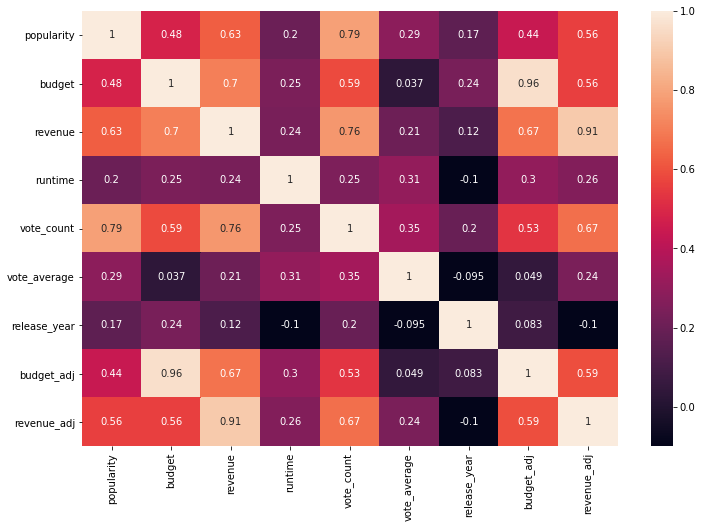

In [26]:
# check correlation between each numeric features

corr = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True);

> - popularity has a positive relationship with revenue, a strong relationship with vote_count
> - Budget has a positive correlation with revenue and vote_count
> - Revenue has a positive relationship with vote_count

# Exploratory Data Analysis

## Research Question 1: Dependency of Revenue on Runtime

> ### 1.1: Distribution of Runtime 

C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


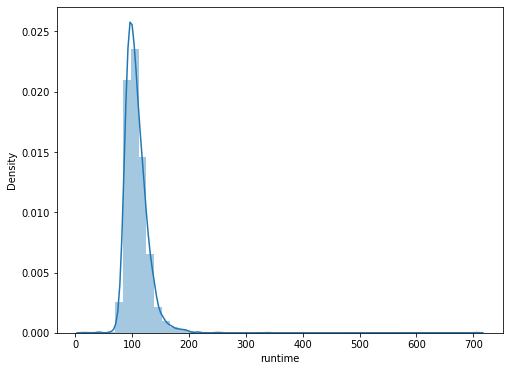

In [27]:
plt.figure(figsize = (8,6))
sns.distplot(df.runtime);

> We have majority of the movies running from 100mins to 200mins

> ### 1.2: Top Movies with the highest runtime 
compared with its revenue

In [28]:
top10_rt = df.sort_values("runtime", ascending = False)[["original_title", "runtime", "revenue"]].head(10).set_index("original_title")

top10_rt

,runtime,revenue
original_title,,
Band of Brothers,705,125000000
Carlos,338,871279
Gettysburg,254,25000000
Cleopatra,248,57750000
Heaven's Gate,219,3484331
Lawrence of Arabia,216,70000000
Gods and Generals,214,12923936
Jodhaa Akbar,213,13000000
Malcolm X,202,48169908


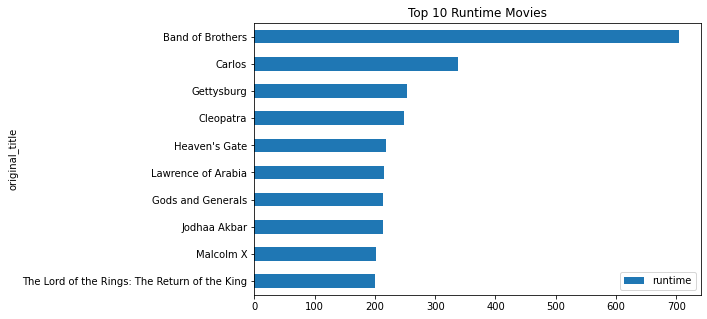

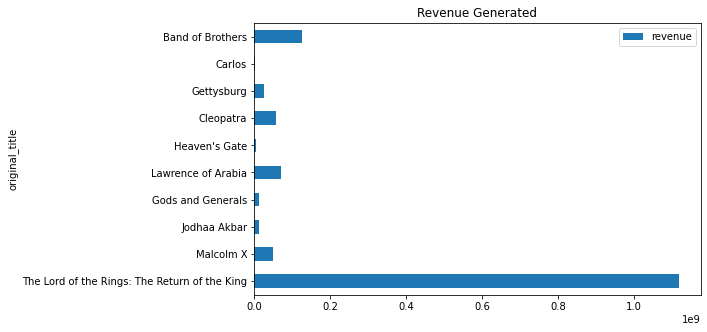

In [29]:
top10_rt.sort_values("runtime", ascending = True, inplace = True)
top10_rt.plot.barh(y = "runtime", figsize = (8,5), ylabel = "runtime", title = "Top 10 Runtime Movies")
top10_rt.plot.barh(y = "revenue", figsize = (8,5), ylabel = "revenue", title = "Revenue Generated")


> "Band of Brothers" has the highest runtime of 705mins, followed by Carlos with 338 mins, with the least runtime (among the top 10) being "The Lord of the rings: The Return of the King", but "The Lord of the rings: The Return of the King" generated the most revenue. This can clearly imply that the sucess of a movie is independent of the runtime of the movie.

> ### 1.3: Correlation between Runtime and Revenue generated

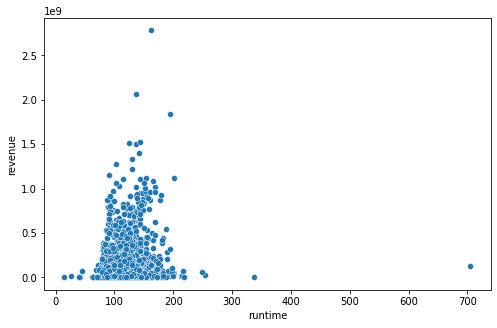

In [30]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = "runtime", y = "revenue", data = df)

> Runtime has very low correlation with revenue generated, and from the heatmap above, they have a correlation of 0.24 (a low positive correlation)

## Research Question 2: Dependency of Revenue on Popularity

> ### 2.1: Distribution of Popularity

C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


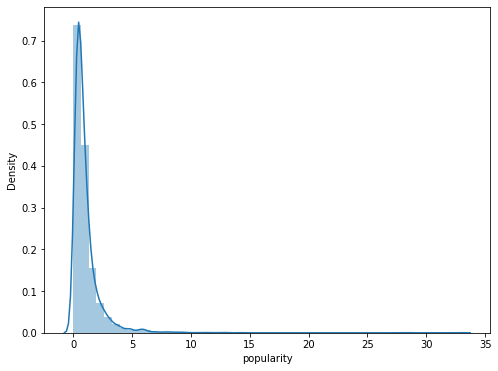

In [31]:
plt.figure(figsize = (8,6))
sns.distplot(df.popularity);

> We have majority of movies with popularity from 0 to 5

> ### 2.2: Top Movies with the Highest Popularity
compared to its revenue

In [32]:
top10_pp = df.sort_values("popularity", ascending = False)[["original_title", 
                                                            "popularity", "revenue"]].head(10).set_index("original_title")

top10_pp

,popularity,revenue
original_title,,
Jurassic World,32.985763,1513528810
Mad Max: Fury Road,28.419936,378436354
Interstellar,24.949134,621752480
Guardians of the Galaxy,14.311205,773312399
Insurgent,13.112507,295238201
Captain America: The Winter Soldier,12.971027,714766572
Star Wars,12.037933,775398007
John Wick,11.422751,78739897
Star Wars: The Force Awakens,11.173104,2068178225


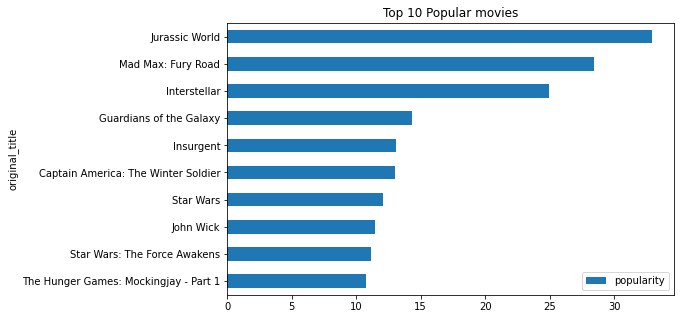

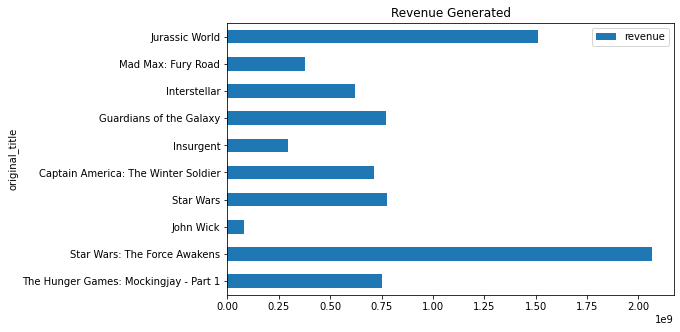

In [33]:
top10_pp.sort_values("popularity", ascending = True, inplace = True)

top10_pp.plot.barh(y = "popularity", figsize = (8,5), ylabel = "popularity", title = "Top 10 Popular movies")
top10_pp.plot.barh(y = "revenue", figsize = (8,5), ylabel = "revenue", title = "Revenue Generated")
# plt.title("Top 10 Popular movies")
# plt.xlabel("popularity");

> Jurassic World came out the most popular movie with 32.985763 popularity, followed by Mad Max: Fury Road with 28.419936 popularity, but Star Wars: The Force Awaken had the highest revenue. Though from the second chart, Jurrasic World had the second highest revenue generated. This can show that the popularity of a movie can affect the revenue generated at the end.

> ### 2.3: Correlation between Popularity and Revenue generated

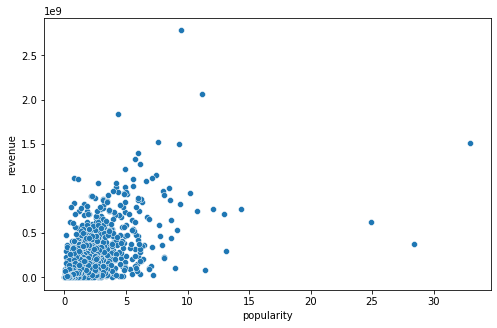

In [34]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = "popularity", y = "revenue", data = df)

> Popularity has high positive correlation with revenue generated with 0.63 correlation (according to the heatmap above)

## Research Question 3: Number of movies released per year?

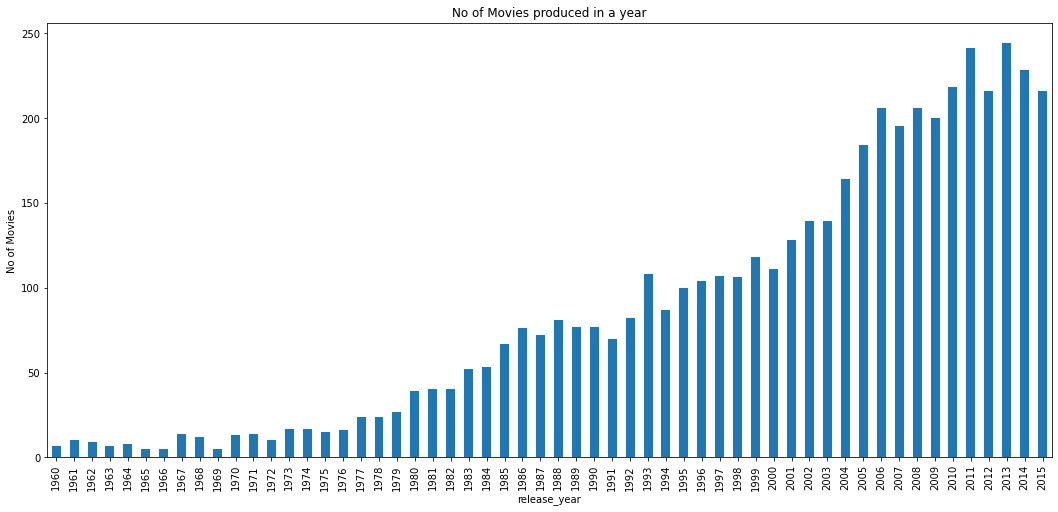

In [35]:
movies_per_year = df.groupby("release_year").count()["original_title"]
movies_per_year.plot.bar(figsize = (18,8))
plt.ylabel("No of Movies")
plt.title("No of Movies produced in a year");

> More movies were released in 2013 with 244 movies, followed by 2010 with close to 218 movies released

## Research Question 4: How many of the top most budget movies made it to the top 10 high gross movies?

> ### 4.1: Top 10 high gross movies

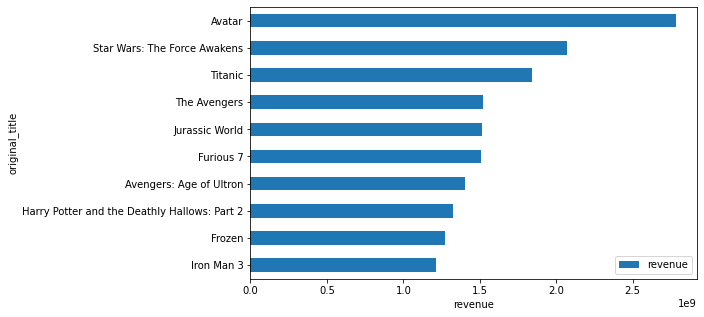

In [36]:
top10_revenue = df.sort_values("revenue", ascending = False)[["original_title", "revenue"]].head(10).set_index("original_title")
top10_revenue.sort_values("revenue", ascending = True, inplace = True)
top10_revenue.plot.barh(figsize = (8,5))
plt.xlabel("revenue");

> ### 4.2: Top 10 Budget movie
Compared to their Revenue

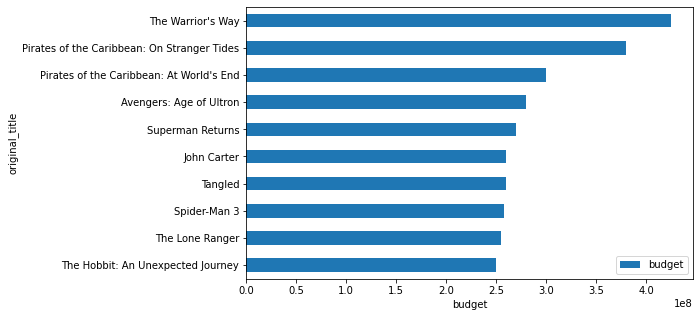

In [37]:
top10_budget = df.sort_values("budget", ascending = False)[["original_title", 
                                                            "budget", "revenue"]].head(10).set_index("original_title")
top10_budget.sort_values("budget", ascending = True, inplace = True)
top10_budget.plot.barh(y = "budget", figsize = (8,5))
plt.xlabel("budget");

In [38]:
check = any(movie in top10_revenue.index for movie in top10_budget)
check

False

> - The Warrior's Way had the highest budget
> - Avatar generated the highest revenue
> - None of the movies that made the top 10 high budget movies made it to the top 10 high gross movies

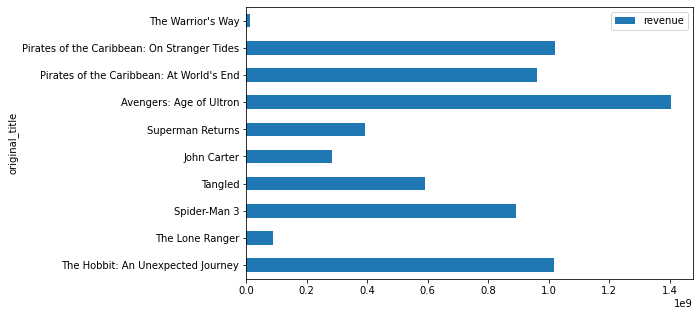

In [39]:
top10_budget.plot.barh(y = "revenue", figsize = (8,5))

> Among the top budgetted movies, Pirate of the Carribbean: On Stranger Tides, cames up among the top generated revenue movies. This can show that the success of a movie is somewhat dependent of it budget.

> Investigation should be made on why some movies with high budget end up with low revenue, which could be as a result of some other underlying factors.

> ### 4.3 Correlation between budget and revenue

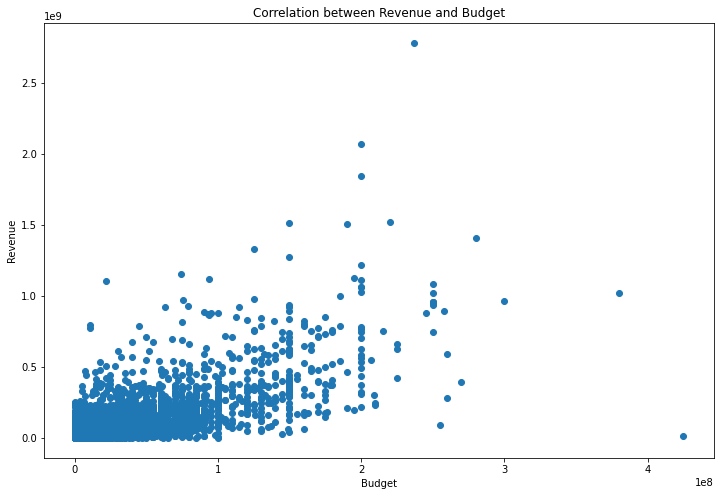

In [40]:
# correlation between budget and revenue

plt.figure(figsize = (12,8))
plt.scatter(x = df.budget, y = df.revenue)
plt.title("Correlation between Revenue and Budget")
plt.xlabel("Budget")
plt.ylabel("Revenue");

> Budget and Revenue has a high correlation or 0.7. This implies that the the budget for a movie does affect the revenue it will generated.

## Research Question 5: How successful are movies with more than one directors?

In [41]:
# get dataframe of movies with multiple (more than one) and one director respectively

multi_dir = df.loc[df.director.str.len() > 1].reset_index(drop=True)
one_dir = df.loc[df.director.str.len() == 1].reset_index(drop=True)

In [42]:
# get the min, max and average revenue generated by each director dataframes

maxi = [max(one_dir.revenue), max(multi_dir.revenue)]
mini = [min(one_dir.revenue), min(multi_dir.revenue)]
avg = [one_dir.revenue.mean(), multi_dir.revenue.mean()]
index = ["one_dir", "multi_dir"]

dir_df = pd.DataFrame({"max_rev": maxi, "min_rev":mini, "avg_rev": avg} , index = index)

dir_df

,max_rev,min_rev,avg_rev
one_dir,2781505847,2,8.612351e+07
multi_dir,1274219009,20,1.373904e+08


<Figure size 1440x1440 with 0 Axes>

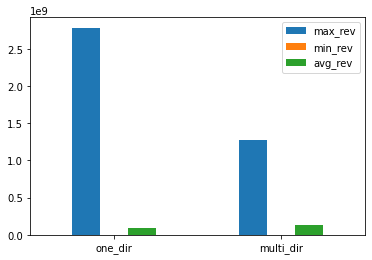

In [43]:
plt.figure(figsize=(20,20))
dir_df.plot.bar(rot = 0);

> On average, movies with multiple directors generate more revenue than movies with one director, though the maximum revenue generated by movies with one_dir is quite higher than that of multiple directors

## Research Question 6: What Genres are most popular from year to year?

In [44]:
# generate dummies dataframe of all movies genres

df_genres = pd.get_dummies(df.genres.apply(pd.Series).stack()).sum(level=0)
df_genres_com = pd.concat([df, df_genres], axis = 1)
df_genres_com.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


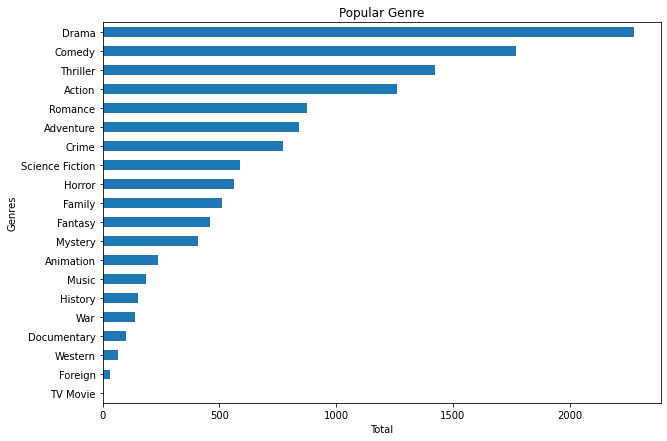

In [45]:
# get total sum of each genres

total_genre = df_genres.sum().sort_values()


total_genre.plot.barh(figsize = (10,7))
plt.title("Popular Genre")
plt.xlabel("Total")
plt.ylabel("Genres");

> Drama and Comedy genre came as as the top 2 popular genres with 2275 and 1771 movies associated with them respectively

In [46]:
# get popular genre for each year

pop_genre_yr = df_genres_com.groupby("release_year")[list(df_genres.columns)].sum()
pop_genre_yr.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,2,1,0,4,0,0,4,1,0,0,1,1,0,0,3,0,0,1,0,1
1961,2,2,1,4,1,0,6,2,0,0,1,1,1,0,1,0,0,0,1,1
1962,2,3,0,1,1,0,6,1,0,0,1,1,1,1,0,0,0,1,1,2
1963,2,2,0,2,1,0,3,0,0,0,3,1,0,1,2,0,0,3,1,0
1964,1,1,0,4,2,0,4,2,1,0,0,0,3,1,2,0,0,2,1,0


In [47]:
# a function to get the most popular genre for each year.

def plot_pop_genre_yr(yr):
    year = pop_genre_yr.loc[yr]
    year = year.sort_values()
    year.plot(kind='barh', figsize = (10,8))
    plt.title("Popular genre in {}".format(yr))
    plt.xlabel("Number")
    plt.ylabel("Genre")
    plt.show()

**NB** : For the purpose of function created and space, the first and last years will be plotted to compare most popular genre

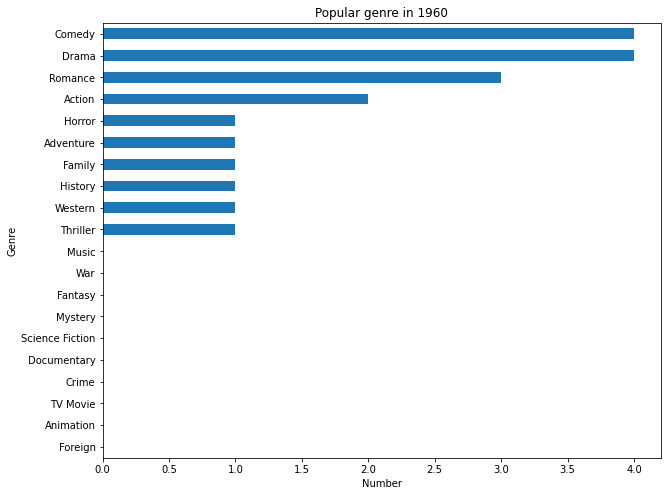

In [48]:
plot_pop_genre_yr(1960)

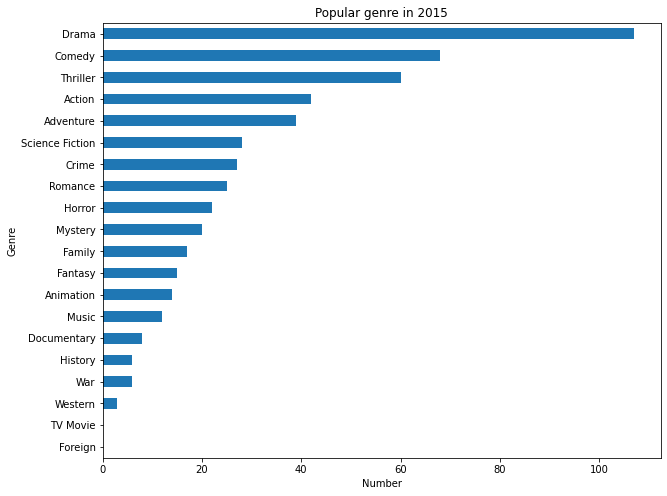

In [49]:
plot_pop_genre_yr(2015)

> In 1960, the comedy genre was the most popular genre, followed by Drama genre, and then Romance, but in 2015 (last recorded year), Drama genre was the most popular, followed by the Comedy genre and then Thriller genre.

> 1960 has no record of Music, War, Fantasy, Mystery, Animation e.t.c. genres (as shown in the plot)

## Research Question 7: Top 10 Casts, Directors and Production Companies

In [50]:
# a function to get the popular categories (Casts, Directors and Production_companies)

def popular(col):
    df_col = pd.get_dummies(df[col].apply(pd.Series).stack()).sum(level=0)
    total_col = df_col.sum().sort_values(ascending = False).head(10)
    total_col.sort_values(inplace = True)
    total_col.plot.barh(figsize = (10,7))
    plt.title("Popular {}".format(col))
    plt.xlabel("Total")
    plt.ylabel(col);

> ### 7.1: Top 10 Most Popular Cast

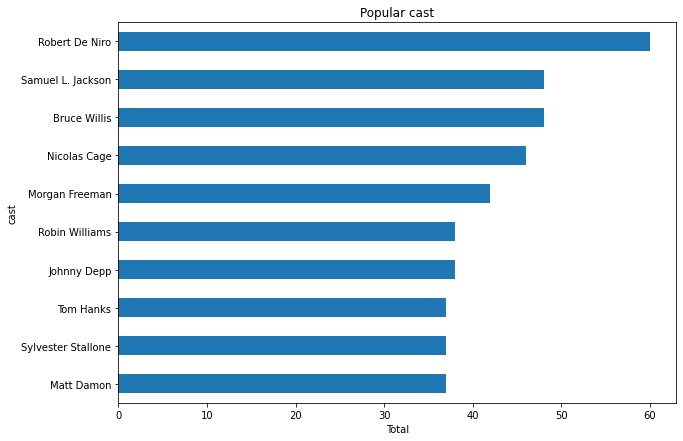

In [51]:
popular("cast")

> Most Popular Cast is Robert De Niro with close to 60 movies featured in, followed by Samuel L. Jackson with close to 50 movies featured in.

> ### 7.2: Top 10 Most Popular Directors

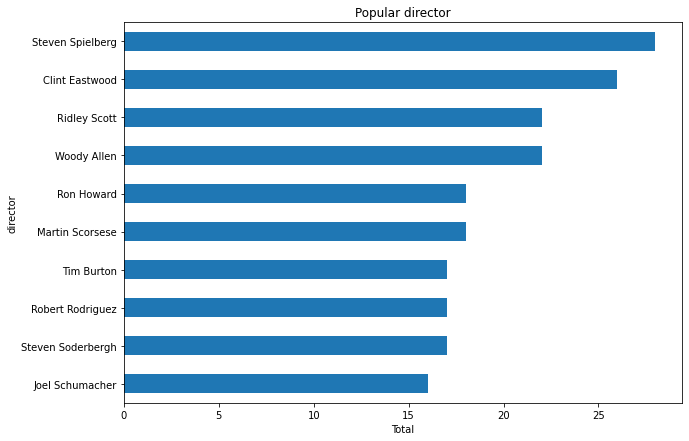

In [52]:
popular("director")

> Most Popular director is Steven Spielberg with over 25 directed movies, followed by Clint Eastwood

> ### 7.3: Top 10 Most Popular Production Companies

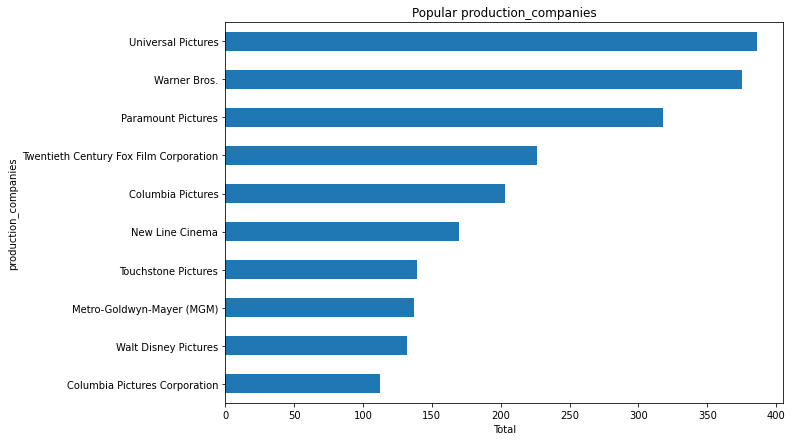

In [53]:
popular("production_companies")

> Universal Pictures has so far produced more movies than any other Production companies

## Top Production Companies with the highest revenue generated, according to the number of movies produced

In [54]:
df_pc = pd.get_dummies(df.production_companies.apply(pd.Series).stack()).sum(level=0)

total_col_pc = pd.DataFrame(df_pc.sum().sort_values(ascending = False).head(10)).reset_index() 
total_col_pc.rename(columns = {"index": "top_pc", 0:"number"}, inplace = True)
top_pc = list(total_col_pc["top_pc"])
df_top_pc = df_pc[top_pc]


df_pc_com = pd.concat([df["revenue"], df_top_pc], axis = 1)
df_pc_com.head()

,revenue,Universal Pictures,Warner Bros.,Paramount Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures,New Line Cinema,Touchstone Pictures,Metro-Goldwyn-Mayer (MGM),Walt Disney Pictures,Columbia Pictures Corporation
0,1513528810,0,0,0,0,0,0,0,0,0,0
1,378436354,0,0,0,0,0,0,0,0,0,0
2,295238201,0,0,0,0,0,0,0,0,0,0
3,2068178225,0,0,0,0,0,0,0,0,0,0
4,1506249360,1,0,0,0,0,0,0,0,0,0


In [55]:
# a loop to get the average revenue generated by the top 10 production companies

rev = []
prod_comp = []

for i in top_pc:
    df_pc = df_pc_com[["revenue", i]]
    df_pc = df_pc[df_pc[i] == 1]["revenue"].mean()
    rev.append(df_pc)
    prod_comp.append(i)

In [56]:
# get a dataframe of each compny against its average revenue

df_prod_comp = pd.DataFrame(rev, prod_comp).reset_index()
df_prod_comp.rename(columns = {"index":"production_comp", 0:"Avg_rev"}, inplace = True)
df_prod_comp.sort_values(by = "Avg_rev", ascending = True, inplace = True)
df_prod_comp = df_prod_comp.head(10)
df_prod_comp

,production_comp,Avg_rev
7,Metro-Goldwyn-Mayer (MGM),8.475384e+07
6,Touchstone Pictures,9.754164e+07
9,Columbia Pictures Corporation,1.108712e+08
5,New Line Cinema,1.204825e+08
0,Universal Pictures,1.247020e+08
2,Paramount Pictures,1.300276e+08
1,Warner Bros.,1.458358e+08
4,Columbia Pictures,1.458388e+08
3,Twentieth Century Fox Film Corporation,1.673813e+08
8,Walt Disney Pictures,2.470560e+08


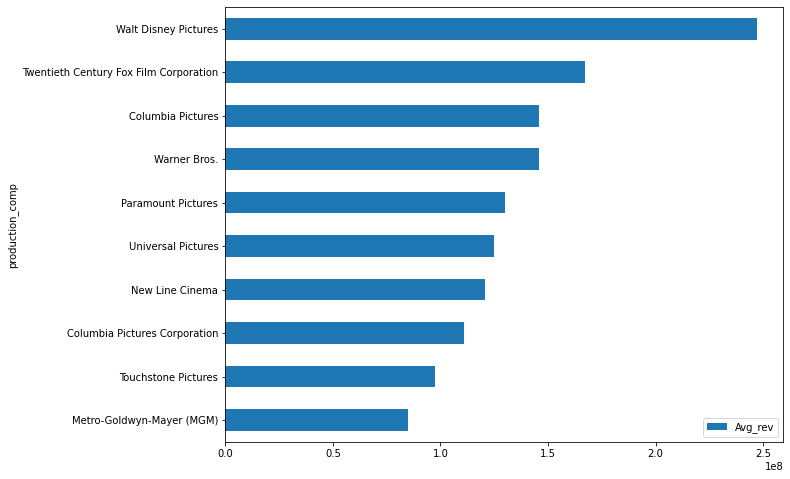

In [57]:
df_prod_comp.plot(kind = "barh", x = "production_comp", y = "Avg_rev", figsize = (10,8))


> Though Universal Pictures has produced more movies than any other production companies, on average, they generated less revenues than some other companies. 

> Walt Dsiney Pictures falling under the bottom 2 among the top 10 Production companies came out as the number one company producing the highest revenue on average.

> Though Twentieth Century Fox Film Corporation, among the top 5 popular companies also fell among the top 3 in avg revenue generated, same as Warnes Bros, Paramount Pictures, Columbia Pictures. This could imply that the productionc company of a movie does affect the success of that movie.

<a id='conclusions'></a>
## Conclusions


### The following conclusions were made
> - The success of a movie is not determined by how long the movie runs for.
> - The popularity of a movies has an effect on the success of that movie.
> - The success of a movie can be determined by the budget of that movie.
> - Movies directed by multiple directors on average, generate more revenue than movied direcetd by one director.
> - Most of the genres produced now weren't produced in the early years.
> - Some of the popular genres in the early years are still popular even now. Drama and Comedy movies are still the most popular movies genres produced.


### Limitations 

> - Some of the columns in the dataset has mulitple values. Attempts to clean them proved difficult based on my knowledge, so had to look for ways to clean them up, and make proper use of those columns.
> - Knowing the right columns to drop, that wont affect the analysis
> - Issues were faced in the determining in=f to drop budget and revenue with zero values. Is it possible to have a movie with zero budget? or a movie generating zero revenue? Should they be dropped? These questions askd led to a great limitation.

<a id='resources used'></a>
### Resources Used

> - https://www.codegrepper.com/code-examples/python/check+if+a+list+contains+any+item+from+another+list+python
> - https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies